# Credit Card Fraud Project

### Description

The aim of this project is to simulate a credit card fraud detection algorithm as close to production-quality as possible. Below you can find the project's outline:

### Outline

1. Establishing the problem

2. Investigating the dataset
    1. EDA
    2. Outliers & Missing Values
    3. Feature importance

3. Setting baseline results
    1. Logistic Regression
    2. Random Forest

4. Base neural network
    1. Construction
    2. Evaluation (loss, accuracy)

5. Hyperparameter Tuning
    1. Layers
    2. Learning rate & optimization
    3. Dropout rate
    4. Batch size

6. Tracking and comparison

7. Future implementations
    1. Latency improvement (TensorRT, ONNX)
    2. Deploying considerations
    3. Security

8. Real data usefulness
    1. Flask implementation

### Establishing the problem

Security.org reports that an estimated 134 million Americans have been a victim of credit card fraud. Additionally, they estimate that 62 million Americans have experienced it in the past year alone. Unfortunately, this problem is getting increasingly worse. The complexity of the situation and the constant malicious attacks that come with it mean that developing a solution is not only extremely difficult, but also needs to be adaptive to ever changing consumer habits. The goal of this project is to simulate the implementation of a (close-to) production-grade machine learning credit card fraud detection program.

### Investigating the dataset

For this machine learning project, I will be using the a fraud dataset dveloped by CiferAI, available on huggingface:

https://huggingface.co/datasets/CiferAI/Cifer-Fraud-Detection-Dataset-AF?utm_source=chatgpt.com

I chose this dataset for a few reasons: the data is completely synthetic and therefore anonymous, the dataset that it is based off of is widely used and available for comparison, but primarily I chose it because it is massive (20 million rows) and will provide a great basis to train what is supposed to be a highly accurate model.

In [17]:
import pandas as pd
import sklearn
import seaborn
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score
from imblearn.over_sampling import SMOTE, RandomOverSampler, ADASYN
from imblearn.under_sampling import RandomUnderSampler, EditedNearestNeighbours
from sklearn.preprocessing import StandardScaler

In [7]:
data = pd.read_csv("~/Downloads/Cifer-Fraud-Detection-Dataset-AF-part-1-14.csv")

In [12]:
print(data['isFraud'].value_counts())

isFraud
0    1498016
1       1984
Name: count, dtype: int64


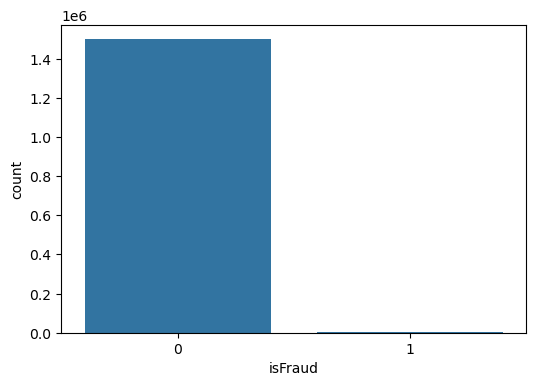

In [15]:
plt.figure(figsize=((6,4)))
seaborn.countplot(x='isFraud', data=data)
plt.show()

The data here is extremely imbalanced, so some tweaking will need to be done in order to make sure that the model can actually identify fraudulent activity.